In [1]:
import os, sys, inspect

import datetime
#rcParams['font.sans-serif'] = ['Tahoma']

import math
import numpy as np
import networkx as nx

from Bio.Seq import Seq as seq

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'monospace'

working_dir = os.path.dirname(
    os.path.abspath(inspect.getfile(inspect.currentframe())))
parent_dir = os.path.dirname(working_dir)
sys.path.insert(0, parent_dir)

from scripts_py import global_parameters as gp
from scripts_py import utility_functions as uf
from scripts_py import analyse_mrna_display as amd
from scripts_py.analyse_mrna_display import Selection

%load_ext autoreload
%autoreload 2

In [2]:
start_sequence = 'CCCCCGTCCTAGCTGCCGCTGCCGCTGCCGCA' #NNK - CGS3an13.R39 truncated reverse complement
stop_sequence = 'CATATGTATATCTCCTTCTTAAAGTT'  # NNK - T7g10M.F48 truncated reverse complement

data_directory_path='../data/ala_scan/'
base_cycle=2
n_top_peptides=100
start_sequence=start_sequence
stop_sequence=stop_sequence
file_name='Paper02_AlaScan_I'

In [3]:
today = uf.get_todays_date() 

display_summaryFileNameCSV = str(today) + 'display_summary' + file_name + '.csv'
display_summaryReportFile = open(display_summaryFileNameCSV, 'w')

display_summary = uf.get_complete_display_summary(
    data_directory_path=data_directory_path,
    cdna_min_length=gp.CDNA_MIN_LENGTH,
    cdna_max_length=gp.CDNA_MAX_LENGTH,
    start_sequence=start_sequence,
    stop_sequence=stop_sequence,
    quality_score=gp.QUALITY_SCORE,
    reverse_complement=True,
    )

SortedRoundsList = sorted(display_summary.keys())

peptides_BY_Round = uf.get_peptides_counts_by_cycle(
    data_directory_path=data_directory_path,
    cdna_min_length=gp.CDNA_MIN_LENGTH,
    cdna_max_length=gp.CDNA_MAX_LENGTH,
    start_sequence=start_sequence,
    stop_sequence=stop_sequence,
    quality_score=gp.QUALITY_SCORE,
    reverse_complement=True,)
#     print(peptides_BY_Round)

#     Totalpeptides_BY_Round = TotalReads_BY_Round(data_directory_path)
Totalpeptides_BY_Round= uf.get_total_reads_per_cycle(
    data_directory_path=data_directory_path,
    cdna_min_length=gp.CDNA_MIN_LENGTH,
    cdna_max_length=gp.CDNA_MAX_LENGTH,
    start_sequence=start_sequence,
    stop_sequence=stop_sequence,
    quality_score=gp.QUALITY_SCORE,
    reverse_complement=True,)
#     print(Totalpeptides_BY_Round)

BaseRoundSortedpeptides = uf.get_base_cycle_sorted_peptides(
    data_directory_path=data_directory_path,
    base_cycle=base_cycle,
    cdna_min_length=gp.CDNA_MIN_LENGTH,
    cdna_max_length=gp.CDNA_MAX_LENGTH,
    start_sequence=start_sequence,
    stop_sequence=stop_sequence,
    quality_score=gp.QUALITY_SCORE,
    reverse_complement=True,)
# print(BaseRoundSortedpeptides)

In [4]:
BaseRoundTopSortedpeptides = BaseRoundSortedpeptides[0 : (n_top_peptides)]


AlaScanpeptidesKDs = {'VWDPRTFYLSRI' : '3', 'AWDPRTFYLSRI' : '8', 'VADPRTFYLSRI' : '413',
                    'VWAPRTFYLSRI' : '28', 'VWDARTFYLSRI' : '12', 'VWDPATFYLSRI' : '2',
                    'VWDPRAFYLSRI' : '12', 'VWDPRTAYLSRI' : '187', 'VWDPRTFALSRI' : '>1000',
                    'VWDPRTFYASRI' : '79', 'VWDPRTFYLARI' : '9', 'VWDPRTFYLSAI' : '468',
                    'VWDPRTFYLSRA' : '6'
                   }

AlaScanpeptidescDNAs = {'VWDPRTFYLSRI' : 'GTTTGGGATCCGAGGACGTTTTATTTGTCTAGGATT',
                        'AWDPRTFYLSRI' : 'GCGTGGGATCCGCGCACCTTTTATCTGAGCCGCATT',
                        'VADPRTFYLSRI' : 'GTGGCGGATCCGCGCACCTTTTATCTGAGCCGCATT',
                        'VWAPRTFYLSRI' : 'GTGTGGGCGCCGCGCACCTTTTATCTGAGCCGCATT',
                        'VWDARTFYLSRI' : 'GTGTGGGATGCGCGCACCTTTTATCTGAGCCGCATT',
                        'VWDPATFYLSRI' : 'GTGTGGGATCCGGCGACCTTTTATCTGAGCCGCATT',
                        'VWDPRAFYLSRI' : 'GTGTGGGATCCGCGCGCGTTTTATCTGAGCCGCATT',
                        'VWDPRTAYLSRI' : 'GTGTGGGATCCGCGCACCGCGTATCTGAGCCGCATT',
                        'VWDPRTFALSRI' : 'GTGTGGGATCCGCGCACCTTTGCGCTGAGCCGCATT',
                        'VWDPRTFYASRI' : 'GTGTGGGATCCGCGCACCTTTTATGCGAGCCGCATT',
                        'VWDPRTFYLARI' : 'GTGTGGGATCCGCGCACCTTTTATCTGGCGCGCATT',
                        'VWDPRTFYLSAI' : 'GTGTGGGATCCGCGCACCTTTTATCTGAGCGCGATT',
                        'VWDPRTFYLSRA' : 'GTGTGGGATCCGCGCACCTTTTATCTGAGCCGCGCG'
                            }

BaseRoundpeptidesRank = uf.get_peptides_rank_in_base_cycle(
    data_directory_path=data_directory_path,
    base_cycle=base_cycle,
    cdna_min_length=gp.CDNA_MIN_LENGTH,
    cdna_max_length=gp.CDNA_MAX_LENGTH,
    start_sequence=start_sequence,
    stop_sequence=stop_sequence,
    quality_score=gp.QUALITY_SCORE,
    reverse_complement=True,)

In [5]:
display_summaryReportFile.write('peptide sequence' + ',')
for Round in SortedRoundsList:
    display_summaryReportFile.write('round # ' + str(Round) + ' occurrence (#)' + ',')
display_summaryReportFile.write('\n')

for peptide in BaseRoundTopSortedpeptides:
    display_summaryReportFile.write(peptide + ',')
    for Round in SortedRoundsList:
        display_summaryReportFile.write(str(peptides_BY_Round[Round].get(peptide, 0)) + ',')
    display_summaryReportFile.write('\n')

display_summaryReportFile.write('total #' + ',')
for Round in SortedRoundsList:
    display_summaryReportFile.write(str(Totalpeptides_BY_Round[Round]) + ',')
display_summaryReportFile.write('\n\n\n')

display_summaryReportFile.write('peptide sequence' + ',')
for Round in SortedRoundsList:
    display_summaryReportFile.write('round # ' + str(Round) + ' fraction (%)' + ',')
display_summaryReportFile.write('\n')

for peptide in BaseRoundTopSortedpeptides:
    display_summaryReportFile.write(peptide + ',')
    for Round in SortedRoundsList:
        peptideFraction = float((peptides_BY_Round[Round].get(peptide, 0)))/float(Totalpeptides_BY_Round[Round])
        display_summaryReportFile.write('{:.3%}'.format(peptideFraction) + ',')
    display_summaryReportFile.write('\n')

display_summaryReportFile.close()

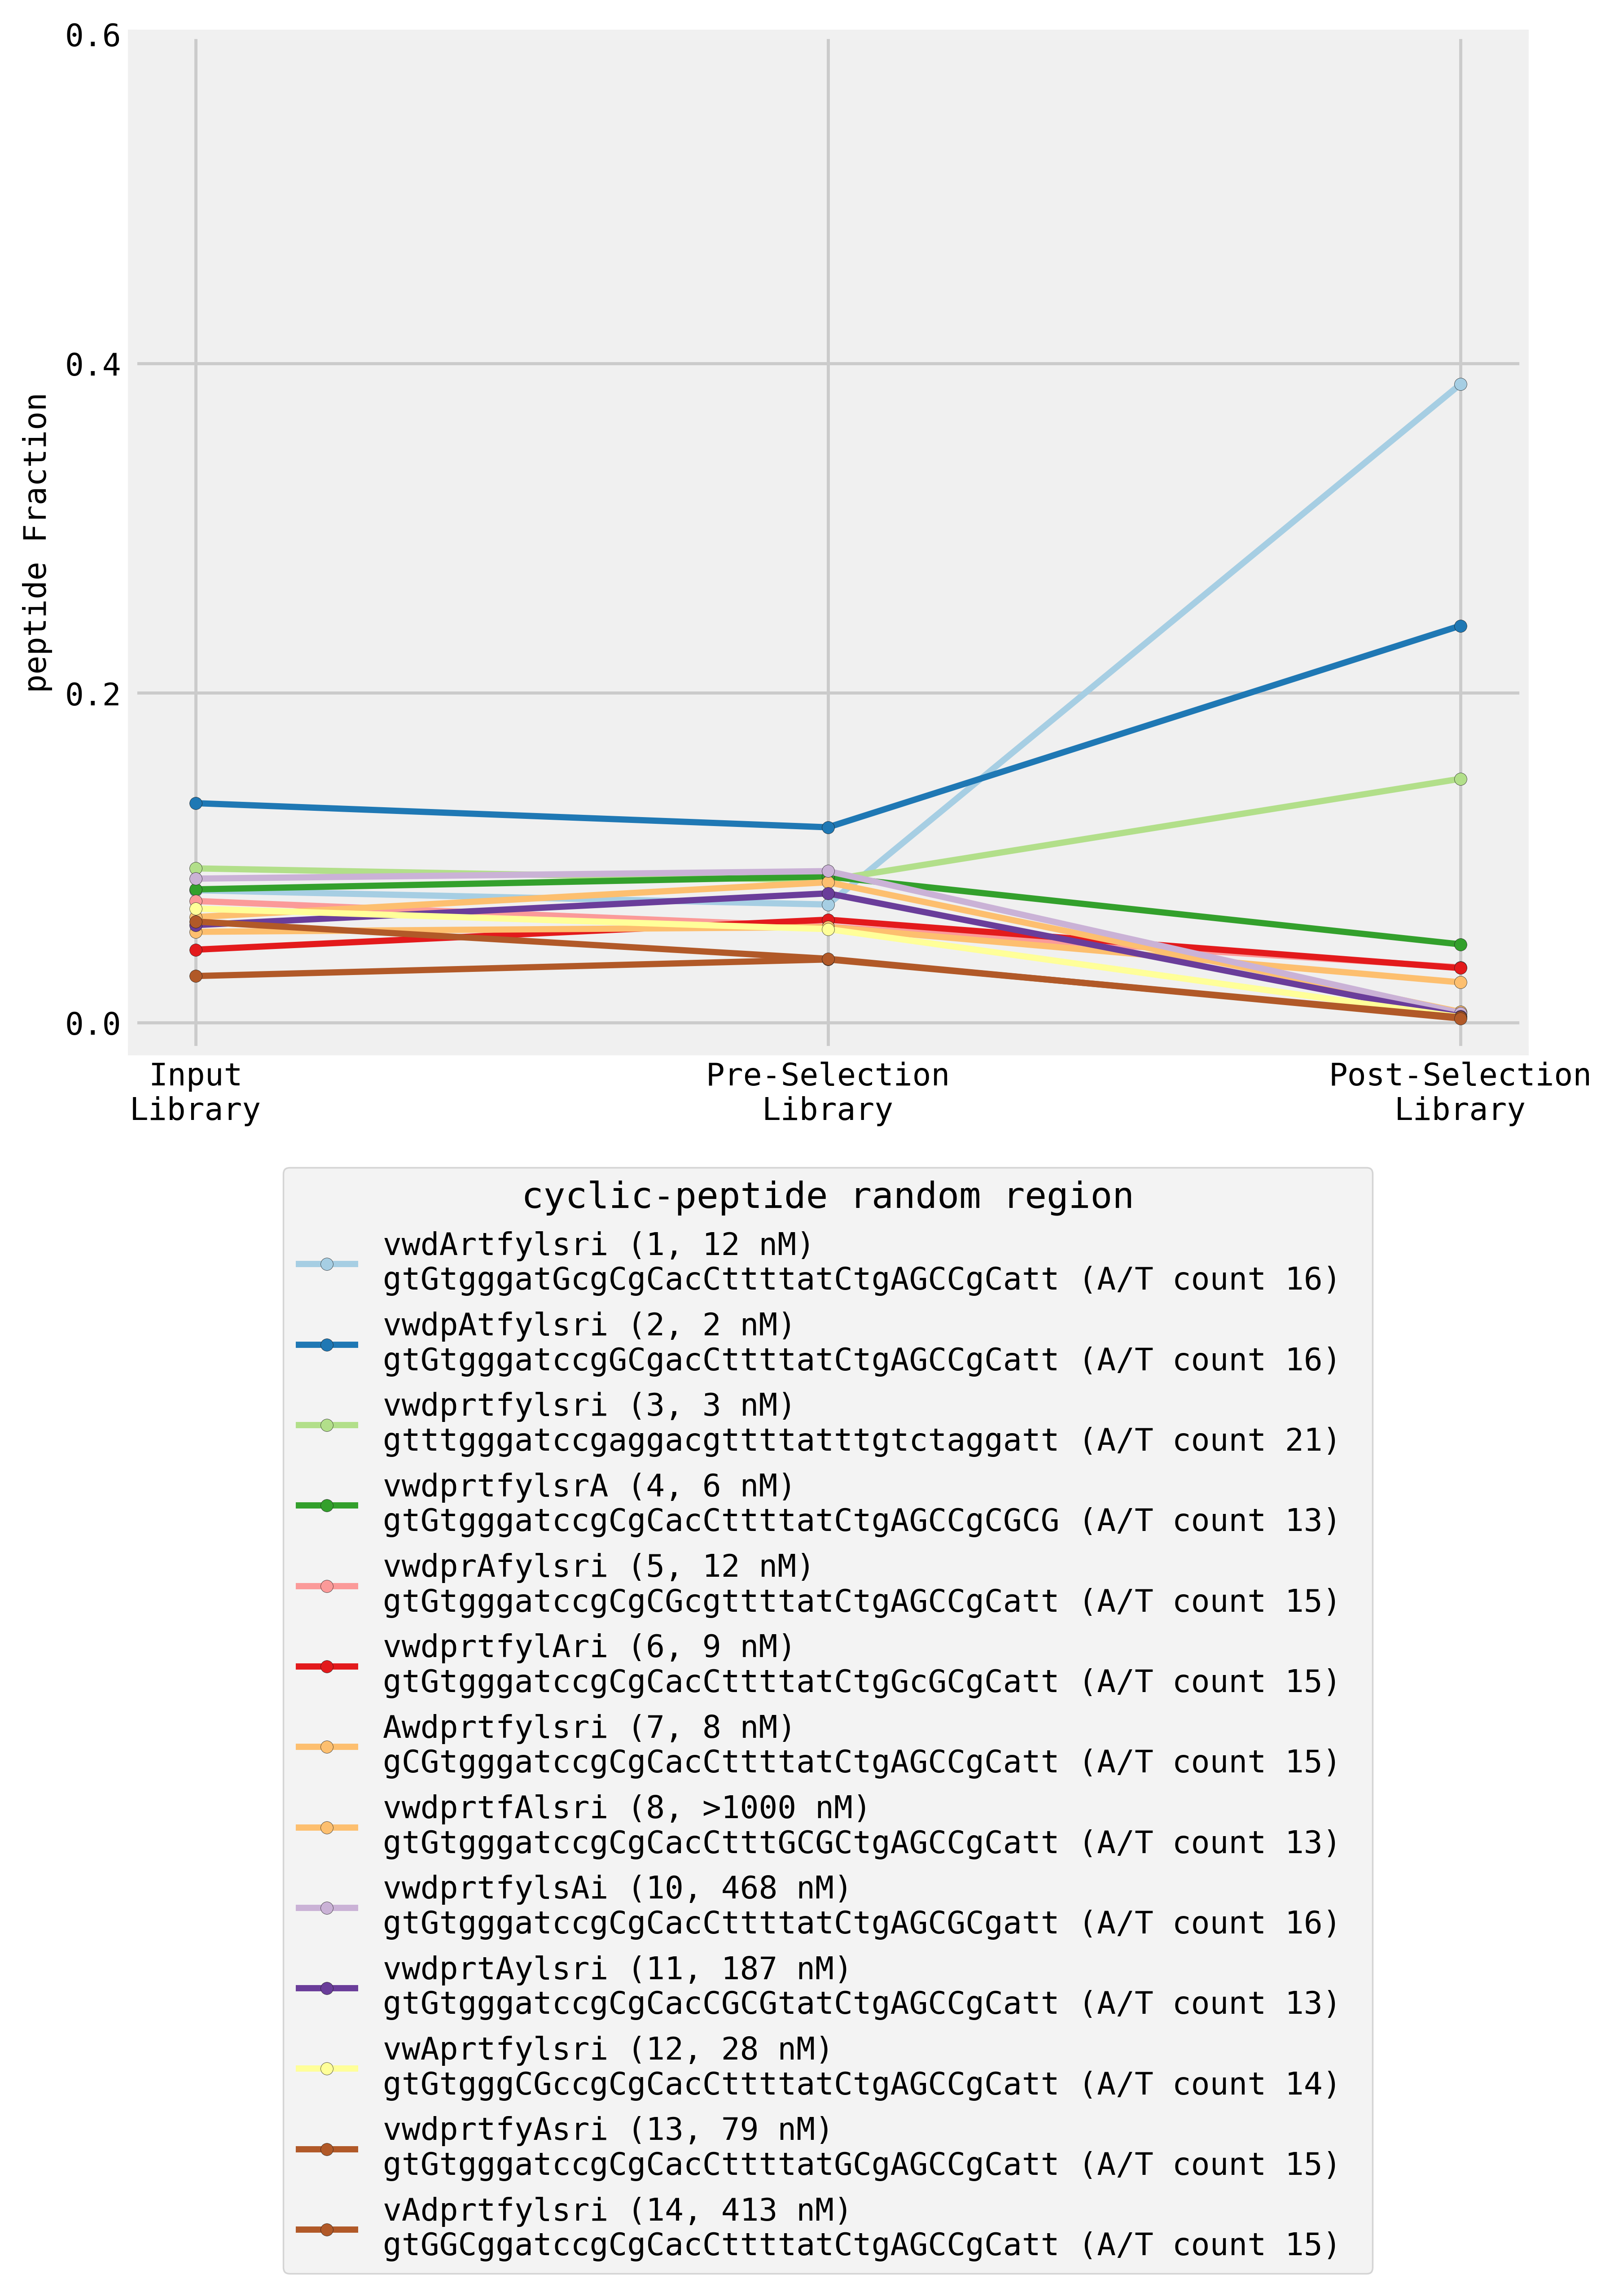

In [6]:
# Create a figure of size 8x6 inches, 500 dots per inch
plt.figure(figsize = (8, 6),
           dpi = 500)
# Create 'ggplot' style
plt.style.use('fivethirtyeight')
# Create a new subplot from a grid of 1x1
Graph = plt.subplot(1, 1, 1)


# Map colours onto lines
# n_top_peptides was replaced with 15, to make gradient more pronounced
cNorm  = matplotlib.colors.Normalize(
    vmin = 0,
    vmax = 15 - 1)
scalarMap = matplotlib.cm.ScalarMappable(
    norm = cNorm,
    cmap = 'Paired')

Xs = []
Ys = []

for peptide in BaseRoundSortedpeptides:
    if peptide in AlaScanpeptidesKDs:
#for peptide in BaseRoundTopSortedpeptides:
        peptidesFractions_BY_Round = []
        for Round in SortedRoundsList:
            peptidesFractions_BY_Round += [
                float((peptides_BY_Round[Round].get(peptide, 0)))
                /float(Totalpeptides_BY_Round[Round])]

        x = SortedRoundsList
        y = peptidesFractions_BY_Round
        Xs += x
        Ys += y


        # Format peptide
        Formatedpeptide = ''
        for i in peptide:
            if i != 'A':
                Formatedpeptide += i.lower()
            else:
                Formatedpeptide += i

        # Set peptideColour
        #peptideColour = scalarMap.to_rgba(BaseRoundTopSortedpeptides.index(peptide))
        cDNA = AlaScanpeptidescDNAs[peptide]
        cDNAATCount = uf.get_au_count(cDNA)
        cDNALabel = uf.format_sequence_based_on_mismatches('GTTTGGGATCCGAGGACGTTTTATTTGTCTAGGATT', cDNA)

        peptideRank = int(BaseRoundpeptidesRank[peptide])
        peptideColour = scalarMap.to_rgba(peptideRank)
        peptideKD = AlaScanpeptidesKDs[peptide]

        peptideLabel = (
            f"{Formatedpeptide} ({peptideRank}, {peptideKD} nM)\n"
            f"{cDNALabel} (A/T count {str(cDNAATCount)}) ")

        plt.plot(x, y,
                 'o-',
                 c = peptideColour,
                 lw = 2.0,
                 ms = 4.0,
                 mew = 0.1,
                 mec = '#191919',
                 label = peptideLabel)

XMin = min(Xs) - 0.05*(max(Xs) - min(Xs))
XMax = max(Xs) + 0.05*(max(Xs) - min(Xs))
YMin = min(Ys) - 0.05*(max(Ys) - min(Ys))
YMax = max(Ys) + 0.05*(max(Ys) - min(Ys))

plt.axis([XMin, XMax, YMin, YMax])

plt.xticks([0, 1, 2],
           ['Input\nLibrary', 'Pre-Selection\nLibrary', 'Post-Selection\nLibrary'],
           fontsize = 10)
#plt.xlabel('Selection Round #',
#           fontsize = 10)

plt.yticks([0.0, 0.2, 0.4, 0.6],
           fontsize = 10)       
plt.ylabel('peptide Fraction',
           fontsize = 10)

legend = plt.legend(#BaseRoundTopSortedpeptides,
                    title = 'cyclic-peptide random region',
                    loc = 'upper center',
                    bbox_to_anchor = (0.5, -0.10),
                    fancybox = True,
                    shadow = False,
                    fontsize = 10,
                    ncol = 1)

Graph.get_legend().get_title().set_size('small')

display_summaryFileNamePNG = str(today) + 'display_summary' + file_name + '.png'

plt.savefig(display_summaryFileNamePNG,
            bbox_extra_artists = [legend],
            bbox_inches = 'tight',
            dpi = 300)
plt.show()
plt.close()